# SETUP DATASET

In [1]:
import pandas as pd

In [2]:
data_indikator_diabetes = pd.read_csv("DATASET/data_indikator_diabetes.csv")

In [3]:
data_indikator_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229474 entries, 0 to 229473
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       229474 non-null  float64
 1   HighBP                229474 non-null  float64
 2   HighChol              229474 non-null  float64
 3   CholCheck             229474 non-null  float64
 4   BMI                   229474 non-null  float64
 5   Smoker                229474 non-null  float64
 6   Stroke                229474 non-null  float64
 7   HeartDiseaseorAttack  229474 non-null  float64
 8   PhysActivity          229474 non-null  float64
 9   Fruits                229474 non-null  float64
 10  Veggies               229474 non-null  float64
 11  HvyAlcoholConsump     229474 non-null  float64
 12  AnyHealthcare         229474 non-null  float64
 13  NoDocbcCost           229474 non-null  float64
 14  GenHlth               229474 non-null  float64
 15  

In [4]:
data_indikator_diabetes['Diabetes_binary'].value_counts()

Diabetes_binary
0.0    194377
1.0     35097
Name: count, dtype: int64

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# NORMAL NAIVE BAYES

In [6]:
# Memisahkan fitur dan label
X = data_indikator_diabetes.drop('Diabetes_binary', axis=1)
y = data_indikator_diabetes['Diabetes_binary']

In [7]:
# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Membuat pipeline untuk scaling dan model
pipeline = BernoulliNB()

In [9]:
normal_naive_bayes = pipeline.fit(X_train, y_train)
normal_naive_bayes

BernoulliNB()

In [10]:
# Evaluasi model di data pengujian
y_pred = normal_naive_bayes.predict(X_test)
print("Accuracy on test set: ", accuracy_score(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))

Accuracy on test set:  0.8251443512365182
Classification report:
               precision    recall  f1-score   support

         0.0       0.88      0.92      0.90     38813
         1.0       0.40      0.28      0.33      7082

    accuracy                           0.83     45895
   macro avg       0.64      0.60      0.62     45895
weighted avg       0.80      0.83      0.81     45895



In [11]:
# Cross-validation score
cross_val_scores = cross_val_score(normal_naive_bayes, X, y, cv=5, scoring='accuracy', n_jobs=-1)
print("Cross-validation scores: ", cross_val_scores)
print("Mean cross-validation score: ", np.mean(cross_val_scores))

Cross-validation scores:  [0.83183353 0.82852163 0.82786796 0.82379344 0.82494444]
Mean cross-validation score:  0.8273921993438813


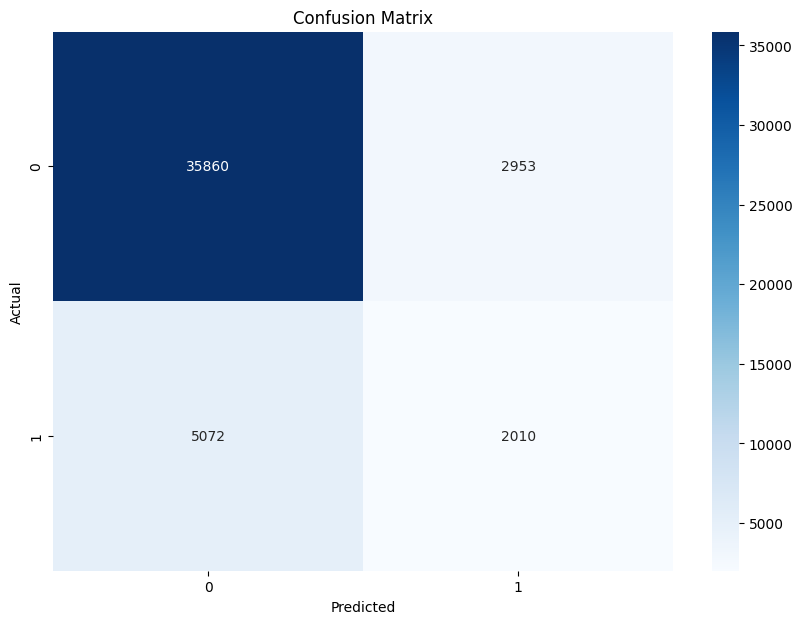

In [12]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [13]:
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(normal_naive_bayes, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

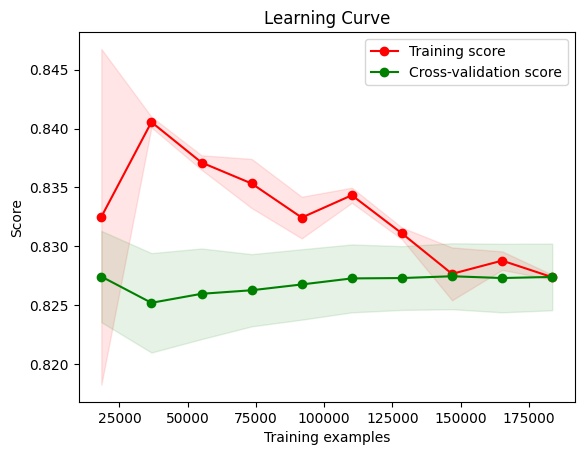

In [14]:
plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc="best")
plt.show()

In [15]:
# Menyimpan hasil prediksi ke file CSV
output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
output.to_csv('MODEL-RESULT/Naive Bayes/Normal_classification_results_NB.csv', index=False)

# Simpan model ke file
with open('MODEL-RESULT/Naive Bayes/Normal_trained_model_NaiveBayes.pkl', 'wb') as file:
    pickle.dump(normal_naive_bayes, file)

# GRIDSEARCH NAIVE BAYES

In [16]:
from imblearn.pipeline import Pipeline as ImbPipeline

In [17]:
# Memisahkan fitur dan label
X = data_indikator_diabetes.drop('Diabetes_binary', axis=1)
y = data_indikator_diabetes['Diabetes_binary']

In [18]:
# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
pipeline = BernoulliNB()

In [20]:
# Menentukan parameter grid untuk GridSearchCV
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100, 1000, 10000]
}

In [21]:
# Melakukan GridSearchCV
nb_grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
nb_grid_search.fit(X_train, y_train)
nb_grid_search

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=BernoulliNB(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100, 1000, 10000]},
             scoring='accuracy', verbose=2)

In [22]:
# Evaluasi model pada data pengujian
y_pred = nb_grid_search.predict(X_test)
print("Test Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

Test Accuracy:  0.8446453862076478
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.85      0.99      0.92     38813
         1.0       0.45      0.03      0.06      7082

    accuracy                           0.84     45895
   macro avg       0.65      0.51      0.49     45895
weighted avg       0.79      0.84      0.78     45895



In [23]:
# Menampilkan parameter terbaik
print("Best parameters found: ", nb_grid_search.best_params_)

Best parameters found:  {'alpha': 10000}


In [24]:
# Cross-validation score
cross_val_scores = cross_val_score(nb_grid_search.best_estimator_, X, y, cv=5, scoring='accuracy', n_jobs=-1)
print("Cross-validation scores: ", cross_val_scores)
print("Mean cross-validation score: ", np.mean(cross_val_scores))

Cross-validation scores:  [0.84693322 0.84671533 0.84721647 0.84569125 0.84516495]
Mean cross-validation score:  0.8463442430109829


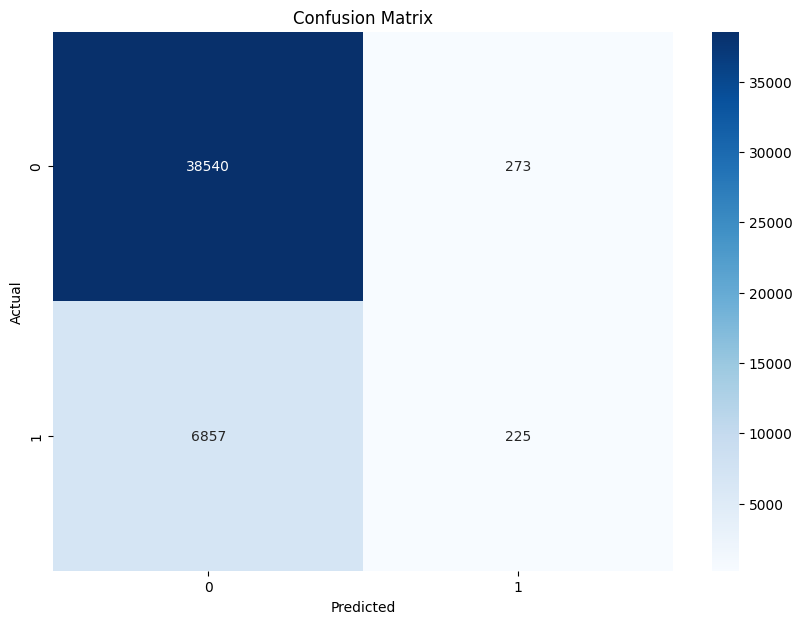

In [25]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [26]:
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(nb_grid_search.best_estimator_, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

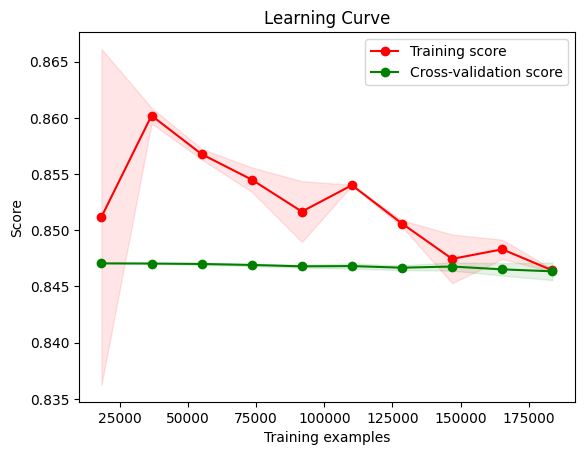

In [27]:
plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc="best")
plt.show()

In [28]:
# Menyimpan hasil prediksi ke file CSV
output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
output.to_csv('MODEL-RESULT/Naive Bayes/GridSearch_classification_results_NB.csv', index=False)
print("Hasil klasifikasi telah disimpan ke file 'classification_results_NB.csv'.")

# Simpan model ke file
with open('MODEL-RESULT/Naive Bayes/GridSearch_trained_model_NaiveBayes.pkl', 'wb') as file:
    pickle.dump(nb_grid_search, file)

Hasil klasifikasi telah disimpan ke file 'classification_results_NB.csv'.


# RANDOMSEARCH NAIVE BAYES

In [29]:
from sklearn.model_selection import RandomizedSearchCV

In [30]:
# Memisahkan fitur dan label
X = data_indikator_diabetes.drop('Diabetes_binary', axis=1)
y = data_indikator_diabetes['Diabetes_binary']

In [31]:
# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
pipeline = BernoulliNB()

In [33]:
# Menentukan parameter grid untuk GridSearchCV
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100, 1000, 10000]
}

In [34]:
# Melakukan GridSearchCV
nb_random_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
nb_random_search.fit(X_train, y_train)
nb_random_search

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=BernoulliNB(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100, 1000, 10000]},
             scoring='accuracy', verbose=2)

In [35]:
# Evaluasi model pada data pengujian
y_pred = nb_random_search.predict(X_test)
print("Test Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

Test Accuracy:  0.8446453862076478
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.85      0.99      0.92     38813
         1.0       0.45      0.03      0.06      7082

    accuracy                           0.84     45895
   macro avg       0.65      0.51      0.49     45895
weighted avg       0.79      0.84      0.78     45895



In [36]:
# Menampilkan parameter terbaik
print("Best parameters found: ", nb_random_search.best_params_)

Best parameters found:  {'alpha': 10000}


In [37]:
# Cross-validation score
cross_val_scores = cross_val_score(nb_random_search.best_estimator_, X, y, cv=5, scoring='accuracy', n_jobs=-1)
print("Cross-validation scores: ", cross_val_scores)
print("Mean cross-validation score: ", np.mean(cross_val_scores))

Cross-validation scores:  [0.84693322 0.84671533 0.84721647 0.84569125 0.84516495]
Mean cross-validation score:  0.8463442430109829


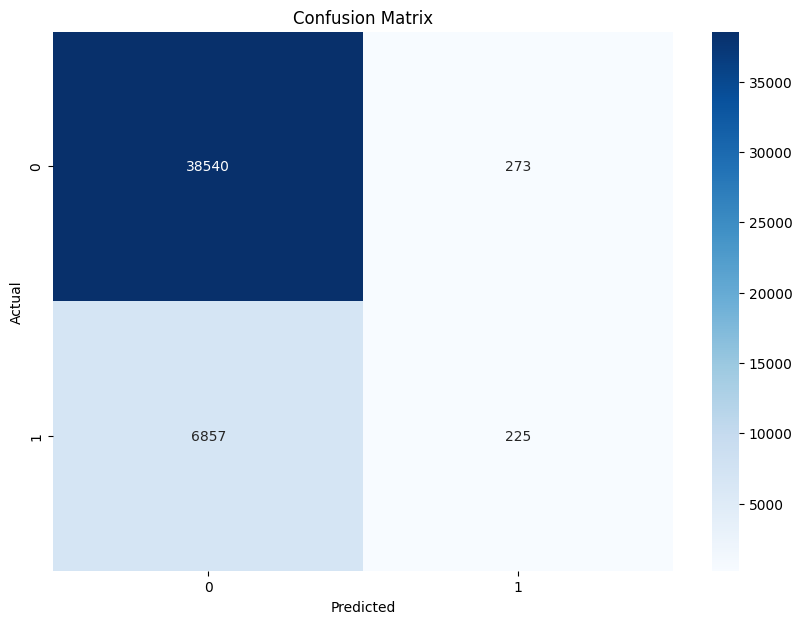

In [38]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [39]:
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(nb_random_search.best_estimator_, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

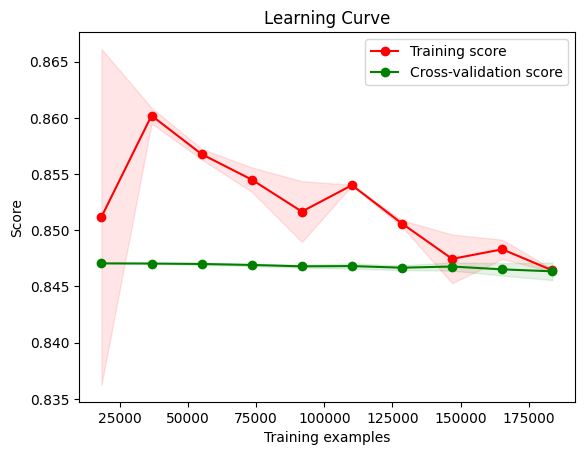

In [40]:
plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc="best")
plt.show()

In [41]:
# Menyimpan hasil prediksi ke file CSV
output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
output.to_csv('MODEL-RESULT/Naive Bayes/RandomSearch_classification_results_NB.csv', index=False)
print("Hasil klasifikasi telah disimpan ke file 'classification_results_NB.csv'.")

# Simpan model ke file
with open('MODEL-RESULT/Naive Bayes/RandomSearch_trained_model_NaiveBayes.pkl', 'wb') as file:
    pickle.dump(nb_random_search, file)

Hasil klasifikasi telah disimpan ke file 'classification_results_NB.csv'.
